# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [10]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [43]:
filtered_df = df_titanic[(df_titanic["class"] == "1st") | (df_titanic["class"] == "2nd") | (df_titanic["class"] == "3rd")]
cross_tab = pd.crosstab(filtered_df["class"], filtered_df["embarked"])
print(cross_tab)



embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [48]:
# Code here
cond_dist = pd.crosstab(filtered_df["class"], filtered_df["embarked"], normalize=True)
print(cond_dist)

embarked         B         C         Q         S
class                                           
1st       0.002278  0.108580  0.002278  0.132878
2nd       0.004556  0.019742  0.005315  0.186029
3rd       0.000000  0.077449  0.085801  0.375095


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

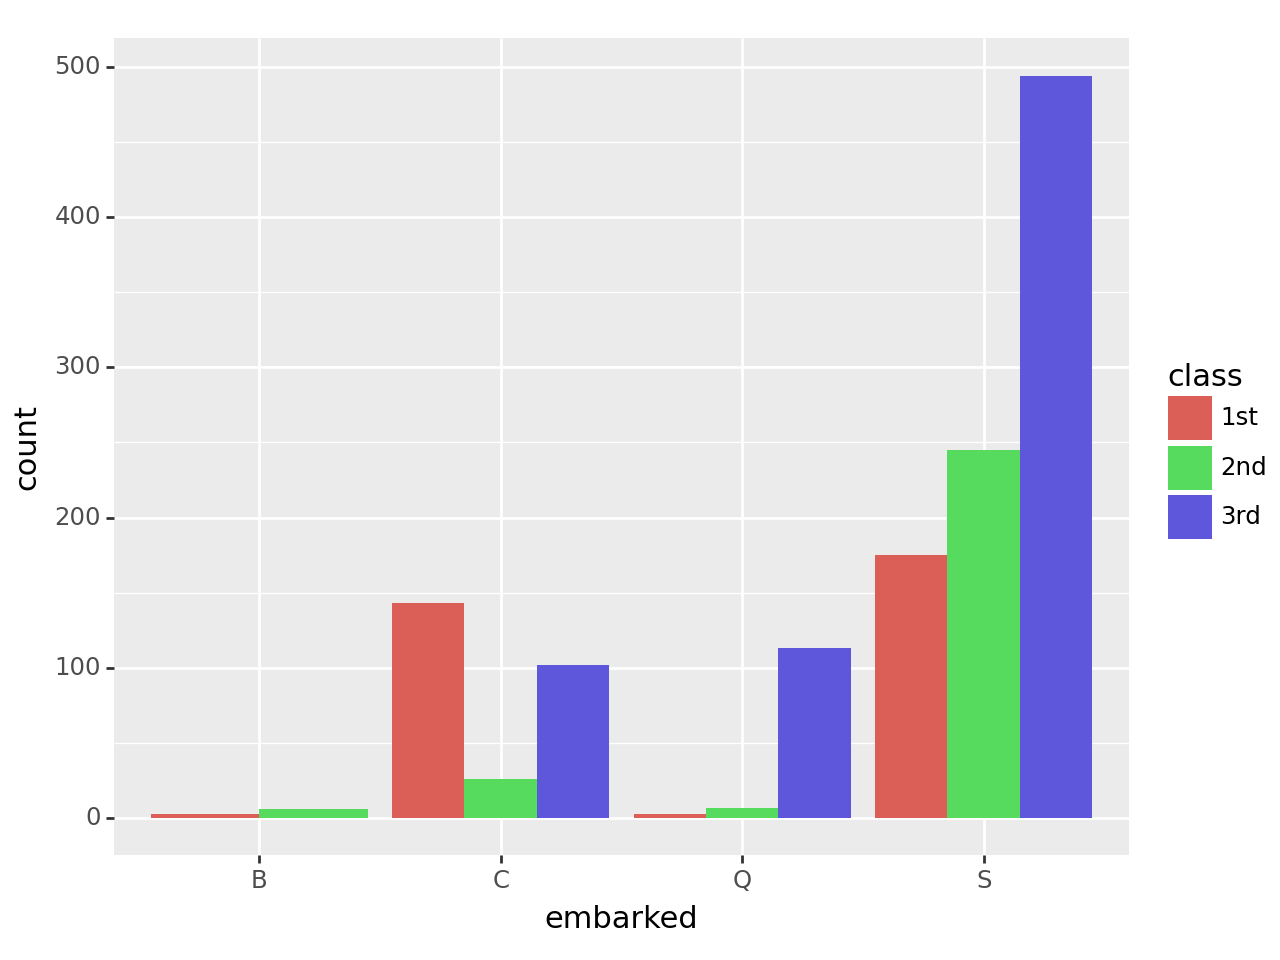

<Figure Size: (640 x 480)>

In [60]:
from plotnine import ggplot, aes, geom_bar
(ggplot(filtered_df,
aes(
  x = "embarked",
  fill = "class"
))
+ geom_bar(position = "dodge")
)

Pros:


*   Easy to understand the difference between 1st, 2nd, 3rd class;
*   It allows for a direct visual comparison of passenger class proportions between embarkation locations;


*   Conditional distributions provide exact proportions and are suitable for precise quantitative analysis;

Cons:


*   Bar plots dont provide the same level of numerical precision as conditional distributions, making it less suitable for precise quantitative analysis.
*   Stacked bar plots work well when dealing with categorical data, but they may not be the best choice for more complex data distributions.









